In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#H:\\Dataset\\crime-rates\\
#H:\\Dataset\\usa-education-budget-analysis\\data\\
#import 2 files 
#First one is crime : has all crimes in USA 1975-2015 and their classifications
#Second one is edu_budget : has USA education budget, GDP and ratio between them for 1976-2016
crime = pd.read_csv('crime-rates.csv')
edu_budget = pd.read_csv('data.csv')

In [3]:
#The file contains all crimes collected for each year in the end after all cities
#We pull all crimes for United States, rename the columns and slicing the years
all_us_crimes = crime[crime['agency_jurisdiction'] == 'United States']
all_us_crimes = all_us_crimes[[ 'report_year', 'agency_jurisdiction', 'violent_crimes']]
all_us_crimes.columns = ['year', 'country', 'all_crimes']
all_us_crimes = all_us_crimes.reset_index().iloc[1:,].drop('index', axis=1)


In [4]:
edu_budget = edu_budget[['YEAR', 'BUDGET_ON_EDUCATION']]
edu_budget.columns = ['year', 'edu_spending']
edu_budget = edu_budget.iloc[:-1,]


#all_us_crimes
edu_budget

,year,edu_spending
0,1976,9314.0
1,1977,10568.0
2,1978,11625.0
3,1979,13996.0
4,1980,15209.0
5,1981,16752.0
6,1982,15374.0
7,1983,15267.0
8,1984,15336.0
9,1985,18952.0


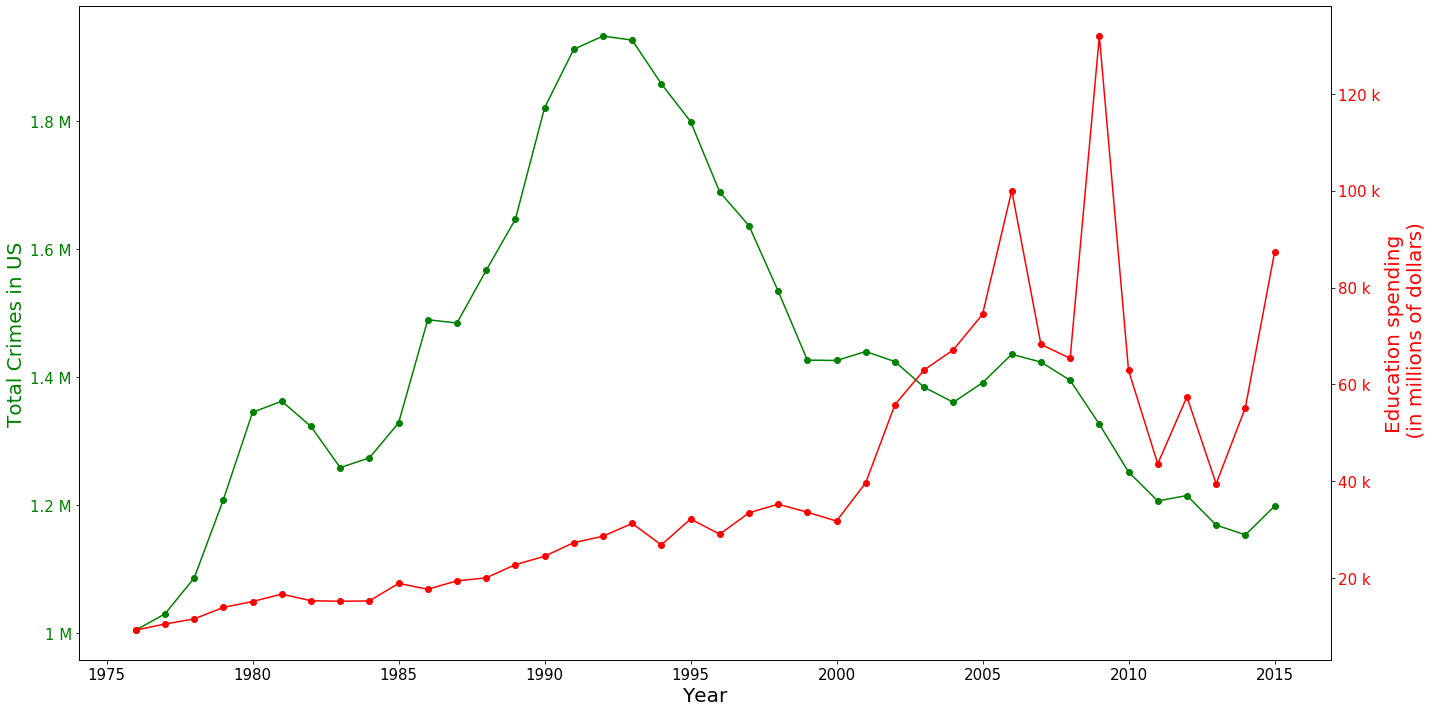

In [5]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Total Crimes in US', color='g', fontsize=20)
ax1.plot(all_us_crimes.year, all_us_crimes.all_crimes, 'o-g')
ax1.tick_params(axis='y', labelsize=15, labelcolor='g')#Control tick's labelsize or labelcolor
ax1.tick_params(axis='x', labelsize=15)
ax1.yaxis.set_major_formatter(ticker.EngFormatter())#Format axis tick labels from number to thousands or Millions.

ax2 = ax1.twinx() 

ax2.set_ylabel('Education spending\n (in millions of dollars)', color='r', fontsize=20) 
ax2.plot(edu_budget.year, edu_budget.edu_spending, 'o-r')
ax2.tick_params(axis='y', labelsize=15, labelcolor='r')
ax2.yaxis.set_major_formatter(ticker.EngFormatter())
fig.tight_layout()
plt.show()

In [6]:
np.corrcoef(edu_budget['edu_spending'], all_us_crimes['all_crimes'])

array([[ 1.       , -0.0982174],
       [-0.0982174,  1.       ]])